In [3]:
import re
from collections import defaultdict
import jsonpickle
from proquest_text_parser import *

# Dict keys
- Full text: 
    - Followed by `Subject:`
- Title: 
- Publication date:
- Publisher:
- Publication title:
- Source type:
- Document type:

Derive:
- ID: {initials of titles + pub_title initials + publication date} 


# Main

In [5]:
from proquest_text_parser import *

# ID with pub title
dir = "./data/raw_240227/voice"
file_num = 11
date = "2024-02-28"
voice_raw_list = main_parser_proquest(dir, file_num, date)
voice_dict = text2dict(voice_raw_list)

dir = "./data/raw_240227/yes"
file_num = 3
date = "2024-02-27"
yes_raw_list = main_parser_proquest(dir, file_num, date)
yes_dict = text2dict(yes_raw_list)

dir = "./data/raw_240227/no"
file_num = 2
date = "2024-02-27"
no_raw_list = main_parser_proquest(dir, file_num, date)
no_dict = text2dict(no_raw_list)

print(f"voice corpus size: {len(voice_dict)}")
print(f"yes corpus size: {len(yes_dict)}")
print(f"no corpus size: {len(no_dict)}")

voice corpus size: 4541
yes corpus size: 1077
no corpus size: 838


In [6]:
voice_dict

{'IvtpreaLh-TA(CA-20231119': {'text': 'The spiritual home of Holden and Cold Chisel might be the working-class heartland of the ALP, but it helped to sound the death knell of the voice, returning a 72 per cent No vote. The devastating result was one percentage point ahead of the highest no-voting seats beyond SA, tellingly in the historic coalmining Labor strongholds of Hunter and Paterson in the NSW Hunter Valley, which voted 71 per cent no.\nThe referendum’s most brutal rejection occurred in the exact place Prime Minister Anthony Albanese and voice co-architect Noel Pearson launched the official Yes campaign in the northern suburb of Elizabeth, framed around a fruitless pitch to SA’s progressive traditions as the first state to embrace female suffrage, decriminalise homosexuality and enact land rights legislation.\nThat was back in August, in happier times for voice advocates when they still thought they were a chance. It’s a chance that in hindsight seems fanciful, with battling Eli

In [5]:
for k, v in voice_dict.items():
    if v['doc'] != 'News':
        print(v['doc'])

Journal Article
Book
Journal Article
None
Opinions, Commentary
Transcript
General Information
Blogs
Journal Article
Blogs
Commentary
Commentary
General Information
Feature
Commentary, Opinions
General Information
Opinions, Editorial
Transcript
Opinions, Editorial
None
Commentary, Opinions
Opinions, Editorial
Opinions, Editorial
None
Commentary, Editorial
Ne ws
None
Commentary, Opinions
General Information
None
None
Blogs
Ne ws
Blogs
Blogs
Opinions, Editorial
Commentary
None
Editorial
Editorial
Commentary
Opinions, Editorial
Blogs
Commentary
Editorial
Blogs
Blogs
None
Commentary
Blogs
Commentary
Blogs
Opinions, Editorial
Opinions, Editorial
New s
Opinions, Editorial
Opinions, Editorial
None
Book Review
Editorial
Blogs
Commentary
Commentary
Commentary
Opinions, Editorial
Opinions, Editorial
Opinions, Editorial
Opinions, Editorial
Editorial
Opinions, Editorial
Opinions, Editorial
None
New s
New s


In [7]:
save_path_template = "./data/pickle_240227/"

with open(save_path_template+'voice.pickle', 'w') as voice_file, \
    open(save_path_template+'yes.pickle', 'w') as yes_file, \
    open(save_path_template+'no.pickle', 'w') as no_file:
    voice_file.write(jsonpickle.encode(voice_dict))
    yes_file.write(jsonpickle.encode(yes_dict))
    no_file.write(jsonpickle.encode(no_dict))

# Analyse media

### Media counting

In [10]:
with open("./data/pickle_240227/voice.pickle") as voice_file:
    voice_dict = jsonpickle.decode(voice_file.read())

In [3]:
pub_title_count = defaultdict(int)

for k,v in voice_dict.items():
    pub_title_count[v["pub_title"]] += 1
for k,v in yes_dict.items():
    pub_title_count[v["pub_title"]] += 1
for k,v in no_dict.items():
    pub_title_count[v["pub_title"]] += 1

ptc_sorted = sorted(pub_title_count.items(), key=lambda x: x[1], reverse=True)
ptc_sorted

[('The Australian (Online); Canberra, A.C.T.', 1061),
 ('The Guardian (Online); London (UK)', 353),
 ('ABC Premium News; Sydney', 292),
 ('The Australian; Canberra, A.C.T.', 270),
 ('The Australian Financial Review; Melbourne', 260),
 ('AAP General News Wire; Sydney', 247),
 ('The Canberra Times; Canberra, A.C.T.', 220),
 ('News.com.au; Sydney, N.S.W.', 188),
 ('The Daily Telegraph (Online); Surrey Hills, N.S.W.', 166),
 ('AAP Bulletin Wire; Sydney', 165),
 ('The Age; Melbourne, Vic.', 162),
 ('The Advertiser; Adelaide, S. Aust.', 158),
 ('Sydney Morning Herald; Sydney, N.S.W.', 157),
 ('The Daily Telegraph; Surry Hills, N.S.W.', 129),
 ('The Courier - Mail; Brisbane, Qld.', 109),
 ('Herald Sun; Melbourne, Vic.', 98),
 ('EveningReport.nz; Auckland', 92),
 ('The Courier - Mail (Online); Brisbane, Qld.', 69),
 ('The Mercury; Hobart Town, Tas.', 69),
 ('The Northern Territory News; Darwin, N.T.', 65),
 ('The Examiner; Launceston, Tas.', 62),
 ('Newcastle Herald; Newcastle, N.S.W.', 59),
 

In [4]:
pub_title_count = defaultdict(int)
for k,v in voice_dict.items():
    pub_title_count[v["pub_title"]] += 1

ptc_sorted = sorted(pub_title_count.items(), key=lambda x: x[1], reverse=True)
ptc_sorted

[('The Australian (Online); Canberra, A.C.T.', 798),
 ('The Guardian (Online); London (UK)', 254),
 ('ABC Premium News; Sydney', 198),
 ('AAP General News Wire; Sydney', 197),
 ('The Australian Financial Review; Melbourne', 193),
 ('The Australian; Canberra, A.C.T.', 174),
 ('The Canberra Times; Canberra, A.C.T.', 153),
 ('News.com.au; Sydney, N.S.W.', 142),
 ('AAP Bulletin Wire; Sydney', 130),
 ('The Age; Melbourne, Vic.', 118),
 ('The Daily Telegraph (Online); Surrey Hills, N.S.W.', 112),
 ('The Advertiser; Adelaide, S. Aust.', 112),
 ('Sydney Morning Herald; Sydney, N.S.W.', 109),
 ('The Daily Telegraph; Surry Hills, N.S.W.', 81),
 ('EveningReport.nz; Auckland', 68),
 ('The Courier - Mail; Brisbane, Qld.', 67),
 ('Herald Sun; Melbourne, Vic.', 55),
 ('The Northern Territory News; Darwin, N.T.', 49),
 ('The Courier - Mail (Online); Brisbane, Qld.', 48),
 ('The Mercury; Hobart Town, Tas.', 42),
 ('Newcastle Herald; Newcastle, N.S.W.', 37),
 ('The Daily Advertiser; Wagga Wagga, N.S.W.'

In [5]:
pub_title_count = defaultdict(int)
for k,v in yes_dict.items():
    pub_title_count[v["pub_title"]] += 1

ptc_sorted = sorted(pub_title_count.items(), key=lambda x: x[1], reverse=True)
ptc_sorted

[('The Australian (Online); Canberra, A.C.T.', 134),
 ('The Australian; Canberra, A.C.T.', 56),
 ('ABC Premium News; Sydney', 48),
 ('The Guardian (Online); London (UK)', 45),
 ('The Australian Financial Review; Melbourne', 40),
 ('The Canberra Times; Canberra, A.C.T.', 37),
 ('The Daily Telegraph (Online); Surrey Hills, N.S.W.', 30),
 ('AAP General News Wire; Sydney', 29),
 ('Sydney Morning Herald; Sydney, N.S.W.', 27),
 ('The Daily Telegraph; Surry Hills, N.S.W.', 27),
 ('The Age; Melbourne, Vic.', 27),
 ('Herald Sun; Melbourne, Vic.', 25),
 ('The Courier - Mail; Brisbane, Qld.', 23),
 ('The Examiner; Launceston, Tas.', 23),
 ('The Advertiser; Adelaide, S. Aust.', 22),
 ('News.com.au; Sydney, N.S.W.', 21),
 ('AAP Bulletin Wire; Sydney', 21),
 ('The Mercury; Hobart Town, Tas.', 19),
 ('Newcastle Herald; Newcastle, N.S.W.', 15),
 ('Weekend Australian; Canberra, A.C.T.', 14),
 ('Illawarra Mercury; Wollongong, N.S.W.', 13),
 ('The Courier - Mail (Online); Brisbane, Qld.', 12),
 ('The Nor

In [6]:
pub_title_count = defaultdict(int)
for k,v in no_dict.items():
    pub_title_count[v["pub_title"]] += 1
ptc_sorted = sorted(pub_title_count.items(), key=lambda x: x[1], reverse=True)
ptc_sorted

[('The Australian (Online); Canberra, A.C.T.', 129),
 ('The Guardian (Online); London (UK)', 54),
 ('ABC Premium News; Sydney', 46),
 ('The Australian; Canberra, A.C.T.', 40),
 ('The Canberra Times; Canberra, A.C.T.', 30),
 ('The Australian Financial Review; Melbourne', 27),
 ('News.com.au; Sydney, N.S.W.', 25),
 ('The Daily Telegraph (Online); Surrey Hills, N.S.W.', 24),
 ('The Advertiser; Adelaide, S. Aust.', 24),
 ('The Daily Telegraph; Surry Hills, N.S.W.', 21),
 ('Sydney Morning Herald; Sydney, N.S.W.', 21),
 ('AAP General News Wire; Sydney', 21),
 ('The Courier - Mail; Brisbane, Qld.', 19),
 ('Herald Sun; Melbourne, Vic.', 18),
 ('The Age; Melbourne, Vic.', 17),
 ('EveningReport.nz; Auckland', 16),
 ('AAP Bulletin Wire; Sydney', 14),
 ('Weekend Australian; Canberra, A.C.T.', 11),
 ('The Daily Advertiser; Wagga Wagga, N.S.W.', 11),
 ('The Examiner; Launceston, Tas.', 10),
 ('7.30; Sydney', 10),
 ('The Courier - Mail (Online); Brisbane, Qld.', 9),
 ('The Mercury; Hobart Town, Tas.'

### Manually delete non-Australian media, and group media for each states.

In [7]:
# A.C.T.
'The Australian' # Leans right 798
'The Canberra Times' # Leans left 153
'Weekend Australia' # (Magazine)

# Sydney
'AAP General News Wire' # (Wire)
'ABC Premium News' # (Neutral)
'AAP Bulletin Wire' # (Wire)
'News.com.au' # Leans right 142
'Sydney Morning Herald' # Leans left 109
'7.30' # (ABC)
'Sun-Herald' # (Herald) 24

# N.S.W.
'The Daily Telegraph (Online)' # Leans right 112
'Newcastle Herald' # Herald 37
'The Daily Advertiser' 
'Illawarra Mercury'

# Melbourne / Vic.
'The Australian Financial Review' # Leans right 193
'The Age' # Leans right 118
'Herald Sun (Online)' # (Herald)
'Geelong Advertiser (Online)' 
'Sunday Age' # (Age)

# Adelaide / S.A.
'The Advertiser' # Leans right
'The Transcontinental'

# Brisbane / Qld
'The Courier - Mail (Online)' # Leans right
'The Cairns Post' # Leans right
'Townsville Bulletin' # Leans right
'The Gold Coast Bulletin' # Leans right
'The Chronicle' # Unclear

# Darwin / N.T.
'The Northern Territory News' # Unclear
'Katherine Times' # Unclear

# Tas
'The Examiner' # Unclear
'The Mercury' # Unclear 
'Advocate' # Unclear
'Sunday Tasmanian' # Unclear

#### The above are the major publication titles from each state.
#### Continue from Sun-Herald if want more.

'Sunday Tasmanian'

### Create target media list. 

In [8]:
pub_title_count = defaultdict(int)
for k,v in voice_dict.items():
    pub_title_count[v["pub_title"]] += 1

ptc_sorted = sorted(pub_title_count.items(), key=lambda x: x[1], reverse=True)
ptc_sorted

[('The Australian (Online); Canberra, A.C.T.', 798),
 ('The Guardian (Online); London (UK)', 254),
 ('ABC Premium News; Sydney', 198),
 ('AAP General News Wire; Sydney', 197),
 ('The Australian Financial Review; Melbourne', 193),
 ('The Australian; Canberra, A.C.T.', 174),
 ('The Canberra Times; Canberra, A.C.T.', 153),
 ('News.com.au; Sydney, N.S.W.', 142),
 ('AAP Bulletin Wire; Sydney', 130),
 ('The Age; Melbourne, Vic.', 118),
 ('The Daily Telegraph (Online); Surrey Hills, N.S.W.', 112),
 ('The Advertiser; Adelaide, S. Aust.', 112),
 ('Sydney Morning Herald; Sydney, N.S.W.', 109),
 ('The Daily Telegraph; Surry Hills, N.S.W.', 81),
 ('EveningReport.nz; Auckland', 68),
 ('The Courier - Mail; Brisbane, Qld.', 67),
 ('Herald Sun; Melbourne, Vic.', 55),
 ('The Northern Territory News; Darwin, N.T.', 49),
 ('The Courier - Mail (Online); Brisbane, Qld.', 48),
 ('The Mercury; Hobart Town, Tas.', 42),
 ('Newcastle Herald; Newcastle, N.S.W.', 37),
 ('The Daily Advertiser; Wagga Wagga, N.S.W.'

In [9]:
target_media = (
    # ABC assume national reach. 230 articles.
    ('ABC Premium News; Sydney', 'neutral', 'national'),
    ('7.30; Sydney', 'neutral', 'national'),

    # ACT. 951 articles. But Australian prolly national reach.
    # ('The Australian (Online); Canberra, A.C.T.', 'right', 'national'),
    ('The Canberra Times; Canberra, A.C.T.', 'left', 'ACT'),
    
    # NSW
    ('News.com.au; Sydney, N.S.W.', 'right', 'national'),
    ('Sydney Morning Herald; Sydney, N.S.W.', 'left', 'NSW'),
    ('Sun-Herald; Sydney, N.S.W.', 'left', 'NSW'),
    ('The Daily Telegraph (Online); Surrey Hills, N.S.W.', 'right', 'NSW'),

    # VIC
    ('The Age; Melbourne, Vic.', 'left', 'VIC'),
    ('Herald Sun; Melbourne, Vic.', 'left', 'VIC'),
    ('Sunday Age; Melbourne, Vic.', 'left', 'VIC'),

    # SA
    ('The Advertiser; Adelaide, S. Aust.', 'right', 'SA'),
    
    # QLD
    ('The Courier - Mail; Brisbane, Qld.', 'right', 'QLD'),
    ('The Cairns Post; Cairns, Qld.', 'right', 'QLD'),
    
    # NT
    ('The Northern Territory News; Darwin, N.T.', 'unclear', 'NT'),

    # TAS
    ('Advocate; Burnie, Tas.', 'unclear', 'TAS'),
    ('The Examiner; Launceston, Tas.', 'unclear', 'TAS'),
    ('The Mercury (Online); Hobart Town', 'unclear', 'TAS'),
)

# Quick check handcrafted attribute.
# set(c for a,b,c in target_media)

Some notes for the hand-crafted target_media list above:
- Some states only have major media with one editorial stance.

### Apply eMFD on media

In [12]:
!pip install spacy==3.4.0
!pip install https://github.com/medianeuroscience/emfdscore/archive/master.zip
!python -m spacy download en_core_web_sm

  Using cached https://github.com/medianeuroscience/emfdscore/archive/master.zip
  Preparing metadata (setup.py) ... done


In [10]:
from emfdscore.scoring import score_docs
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [25]:
print(f"spaCy version: {spacy.__version__}")
print(f"Pandas version: {pd.__version__}")


spaCy version: 3.4.0
Pandas version: 1.5.1


In [11]:
voice_keys = list(voice_dict.keys())
voice_text = [voice_dict[k]['text'] for k in voice_keys]

df_voice = pd.DataFrame.from_dict({0: voice_text}, dtype="string")
# df_voice = pd.read_csv('emfdscore/template_input.csv', header=None)

In [12]:
num_docs = len(df_voice)

DICT_TYPE = 'emfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = 'sentiment'
OUT_CSV_PATH = 'all-sent.csv'

df = score_docs(df_voice,DICT_TYPE,PROB_MAP,SCORE_METHOD,OUT_METRICS,num_docs)


Processed: 0   0% |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
Processed: 4147 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
voice_dates = [voice_dict[k]['date'] for k in voice_keys]
df['date'] = voice_dates
df['date'] = df['date'].apply(lambda x: '-'.join([x[:4], x[4:6], x[6:]]) if x else None)
df['date'] = pd.to_datetime(df['date'])
df['date']

#### Media analysis with binary editorial stance

##### Macro average

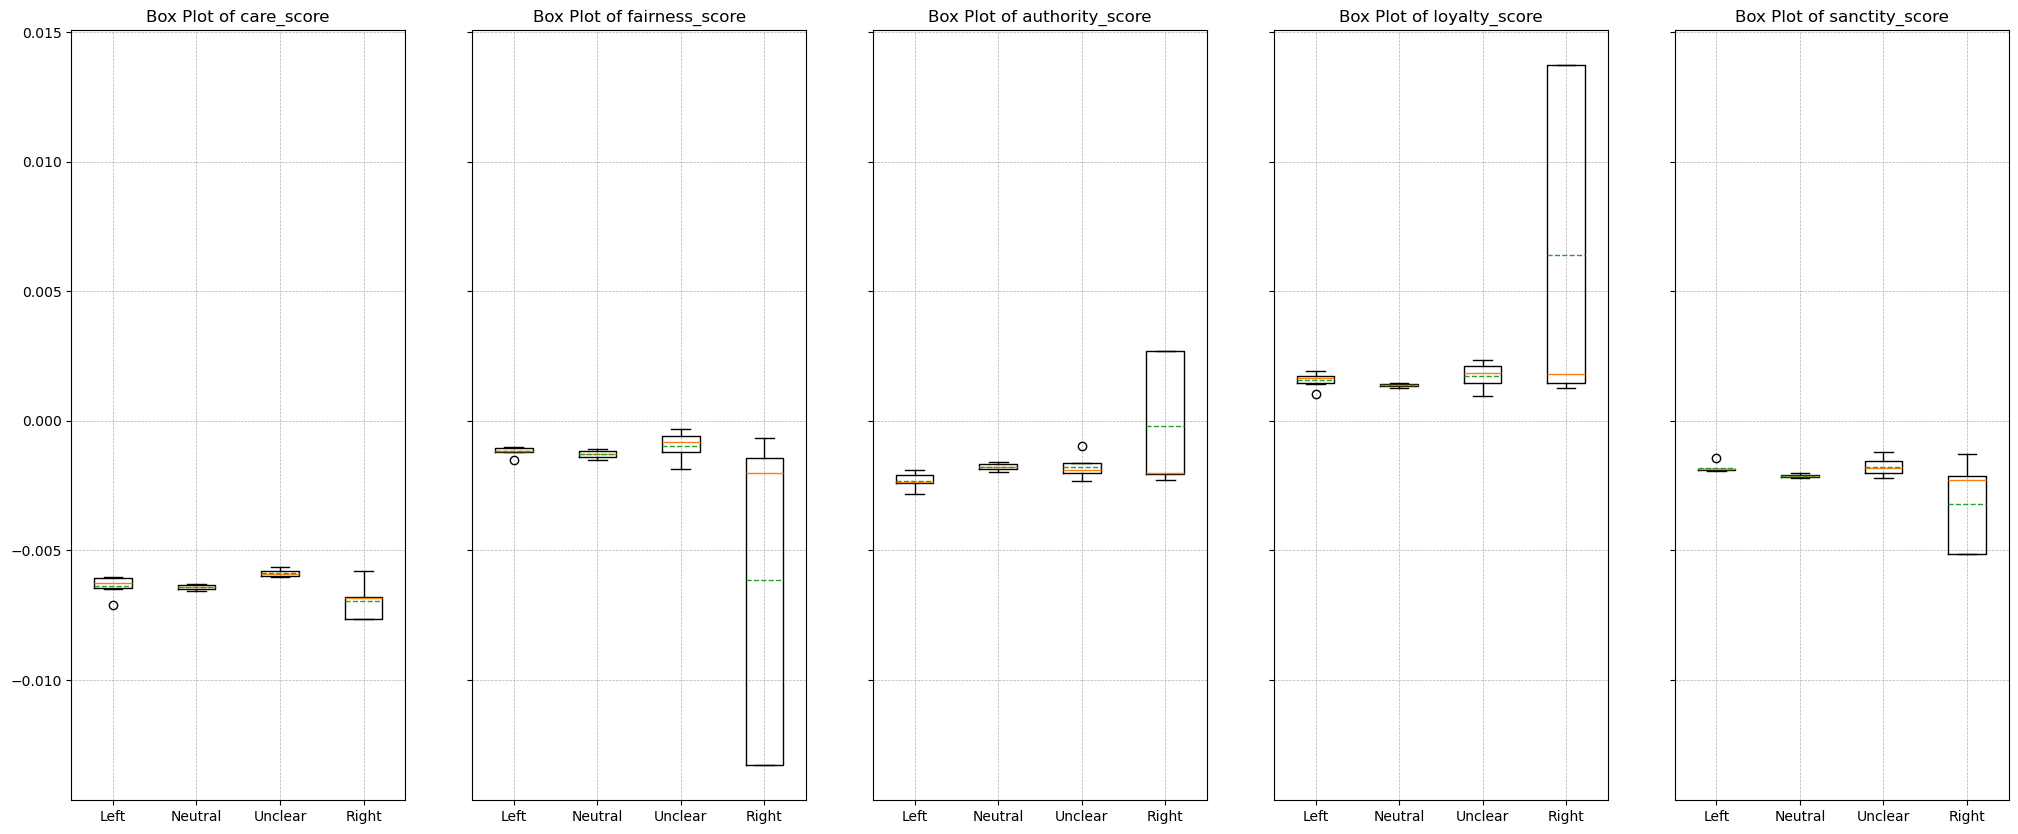

/var/folders/4y/tpc_50fx70d6w16f55qld9fw0000gn/T/ipykernel_86747/3918798996.py:52: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_pub_title_filtered.groupby('edit_stance').mean()


care_score             fairness_score             loyalty_score  \
                  mean       count           mean       count          mean   
edit_stance                                                                   
left         -0.006354   80.833333      -0.001177   80.833333      0.001572   
neutral      -0.006410  115.000000      -0.001282  115.000000      0.001369   
right        -0.006936   92.000000      -0.006139   92.000000      0.006401   
unclear      -0.005867   31.250000      -0.000957   31.250000      0.001745   

                        authority_score             sanctity_score              
                  count            mean       count           mean       count  
edit_stance                                                                     
left          80.833333       -0.002306   80.833333      -0.001806   80.833333  
neutral      115.000000       -0.001766  115.000000      -0.002113  115.000000  
right         92.000000       -0.000183   92.000000      -0.003195   92.000000  
unclear       31.250000       -0.001761   31.250000      -0.001762   31.250000

In [350]:
df['id'] = voice_keys
df['pub_title'] = [voice_dict[id]['pub_title'] for id in voice_keys]
# df.to_csv(OUT_CSV_PATH, index=False)


foundations = ['care', 'fairness', 'loyalty', 'authority', 'sanctity']

for f in foundations:
    df[f'{f}_score'] = df[f'{f}_p'] * df[f'{f}_sent']

# df_pub_title = df.groupby(['pub_title']).mean()
df_pub_title = df.groupby(['pub_title']).agg({
    f'{k}_score': ['mean', 'count'] for k in foundations
})

# Pick out targeted media.
target_indices = [media_data[0] for media_data in target_media]
df_pub_title_filtered = df_pub_title.loc[target_indices]
# Map pub_title to number.
pub_title_list = df_pub_title_filtered.index

df_pub_title_filtered['edit_stance'] = None
df_pub_title_filtered['state'] = None

# Add editorial stances and states of media
for i in range(len(target_media)):
    name, edit_stance, state = target_media[i]
    df_pub_title_filtered.at[name,'edit_stance'] = edit_stance
    df_pub_title_filtered.at[name, 'state'] = state

df_pub_title_filtered.reset_index(inplace=True)
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 10), sharey=True)

foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for i in range(5):
    f = foundations[i]
    axs[i].boxplot([
        df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='left'][f'{f}_score']['mean'],
        df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='neutral'][f'{f}_score']['mean'],
        df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='unclear'][f'{f}_score']['mean'],
        df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='right'][f'{f}_score']['mean'],
    ], meanline=True, showmeans=True)

    axs[i].set_title(f'Box Plot of {f}_score')
    axs[i].set_xticklabels(['Left', 'Neutral', 'Unclear', 'Right'])

    # Config grids
    axs[i].grid(linestyle='--', linewidth=0.5)

plt.show()

df_pub_title_filtered.groupby('edit_stance').mean()

In [312]:
df_pub_title_filtered.groupby('edit_stance').sum()

/var/folders/4y/tpc_50fx70d6w16f55qld9fw0000gn/T/ipykernel_86747/4199925640.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_pub_title_filtered.groupby('edit_stance').sum()


care_score       fairness_score       loyalty_score        \
                  mean count           mean count          mean count   
edit_stance                                                             
left         -0.038124   485      -0.007062   485      0.009434   485   
neutral      -0.012820   230      -0.002564   230      0.002738   230   
right        -0.034678   460      -0.030695   460      0.032005   460   
unclear      -0.023468   125      -0.003826   125      0.006982   125   

            authority_score       sanctity_score        
                       mean count           mean count  
edit_stance                                             
left              -0.013835   485      -0.010835   485  
neutral           -0.003533   230      -0.004225   230  
right             -0.000914   460      -0.015973   460  
unclear           -0.007043   125      -0.007049   125

In [366]:
df_pub_title_filtered.sort_values(('care_score', 'mean'), ascending=False)

pub_title care_score        \
                                                            mean count   
16                  The Mercury (Online); Hobart Town  -0.005626    12   
10                 The Advertiser; Adelaide, S. Aust.  -0.005774   112   
14                             Advocate; Burnie, Tas.  -0.005848    35   
13          The Northern Territory News; Darwin, N.T.  -0.005972    49   
7                            The Age; Melbourne, Vic.  -0.006019   118   
15                     The Examiner; Launceston, Tas.  -0.006022    29   
2                The Canberra Times; Canberra, A.C.T.  -0.006034   153   
8                         Herald Sun; Melbourne, Vic.  -0.006159    55   
0                            ABC Premium News; Sydney  -0.006274   198   
4               Sydney Morning Herald; Sydney, N.S.W.  -0.006342   109   
5                          Sun-Herald; Sydney, N.S.W.  -0.006480    24   
1                                        7.30; Sydney  -0.006545    32   
11                 The Courier - Mail; Brisbane, Qld.  -0.006801    67   
6   The Daily Telegraph (Online); Surrey Hills, N....  -0.006834   112   
9                         Sunday Age; Melbourne, Vic.  -0.007090    26   
12                      The Cairns Post; Cairns, Qld.  -0.007635    27   
3                         News.com.au; Sydney, N.S.W.  -0.007635   142   

   fairness_score       loyalty_score       authority_score        \
             mean count          mean count            mean count   
16      -0.000328    12      0.002336    12       -0.000977    12   
10      -0.000665   112      0.001806   112       -0.002064   112   
14      -0.000671    35      0.002045    35       -0.001836    35   
13      -0.001845    49      0.000965    49       -0.001922    49   
7       -0.001009   118      0.001590   118       -0.001907   118   
15      -0.000982    29      0.001635    29       -0.002309    29   
2       -0.001182   153      0.001769   153       -0.002299   153   
8       -0.001196    55      0.001930    55       -0.002379    55   
0       -0.001493   198      0.001449   198       -0.001958   198   
4       -0.001111   109      0.001423   109       -0.002018   109   
5       -0.001041    24      0.001697    24       -0.002408    24   
1       -0.001071    32      0.001289    32       -0.001575    32   
11      -0.001430    67      0.001460    67       -0.002278    67   
6       -0.002021   112      0.001289   112       -0.001992   112   
9       -0.001523    26      0.001025    26       -0.002825    26   
12      -0.013289    27      0.013725    27        0.002710    27   
3       -0.013289   142      0.013725   142        0.002710   142   

   sanctity_score       edit_stance     state  
             mean count                        
16      -0.001962    12     unclear       TAS  
10      -0.001280   112       right        SA  
14      -0.001199    35     unclear       TAS  
13      -0.002209    49     unclear        NT  
7       -0.001860   118        left       VIC  
15      -0.001680    29     unclear       TAS  
2       -0.001887   153        left       ACT  
8       -0.001919    55        left       VIC  
0       -0.002027   198     neutral  national  
4       -0.001839   109        left       NSW  
5       -0.001423    24        left       NSW  
1       -0.002198    32     neutral  national  
11      -0.002127    67       right       QLD  
6       -0.002278   112       right       NSW  
9       -0.001908    26        left       VIC  
12      -0.005144    27       right       QLD  
3       -0.005144   142       right  national

##### Micro average

In [315]:
def pub2stance(pub, media_data):
    for i in range(len(media_data)):
        if media_data[i][0] == pub:
            return media_data[i][1]
    print("Unexpected behavior.")
    return None

In [319]:
df['id'] = voice_keys
df['pub_title'] = [voice_dict[id]['pub_title'] for id in voice_keys]
# df.to_csv(OUT_CSV_PATH, index=False)

foundations = ['care', 'fairness', 'loyalty', 'authority', 'sanctity']

for f in foundations:
    df[f'{f}_score'] = df[f'{f}_p'] * df[f'{f}_sent']

# Add editorial stances and states of media
for i in range(len(target_media)):
    name, edit_stance, state = target_media[i]
    df['edit_stance'] = df['pub_title'].apply(pub2stance, args=[target_media])

# 'Unexpected behavior' expected because in the micro method media is not filtered.

Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected be

In [323]:
df_micro_stance = df.groupby(['edit_stance']).agg({
    f'{k}_score': ['mean', 'count'] for k in foundations
})
df_micro_stance.reset_index(inplace=True)

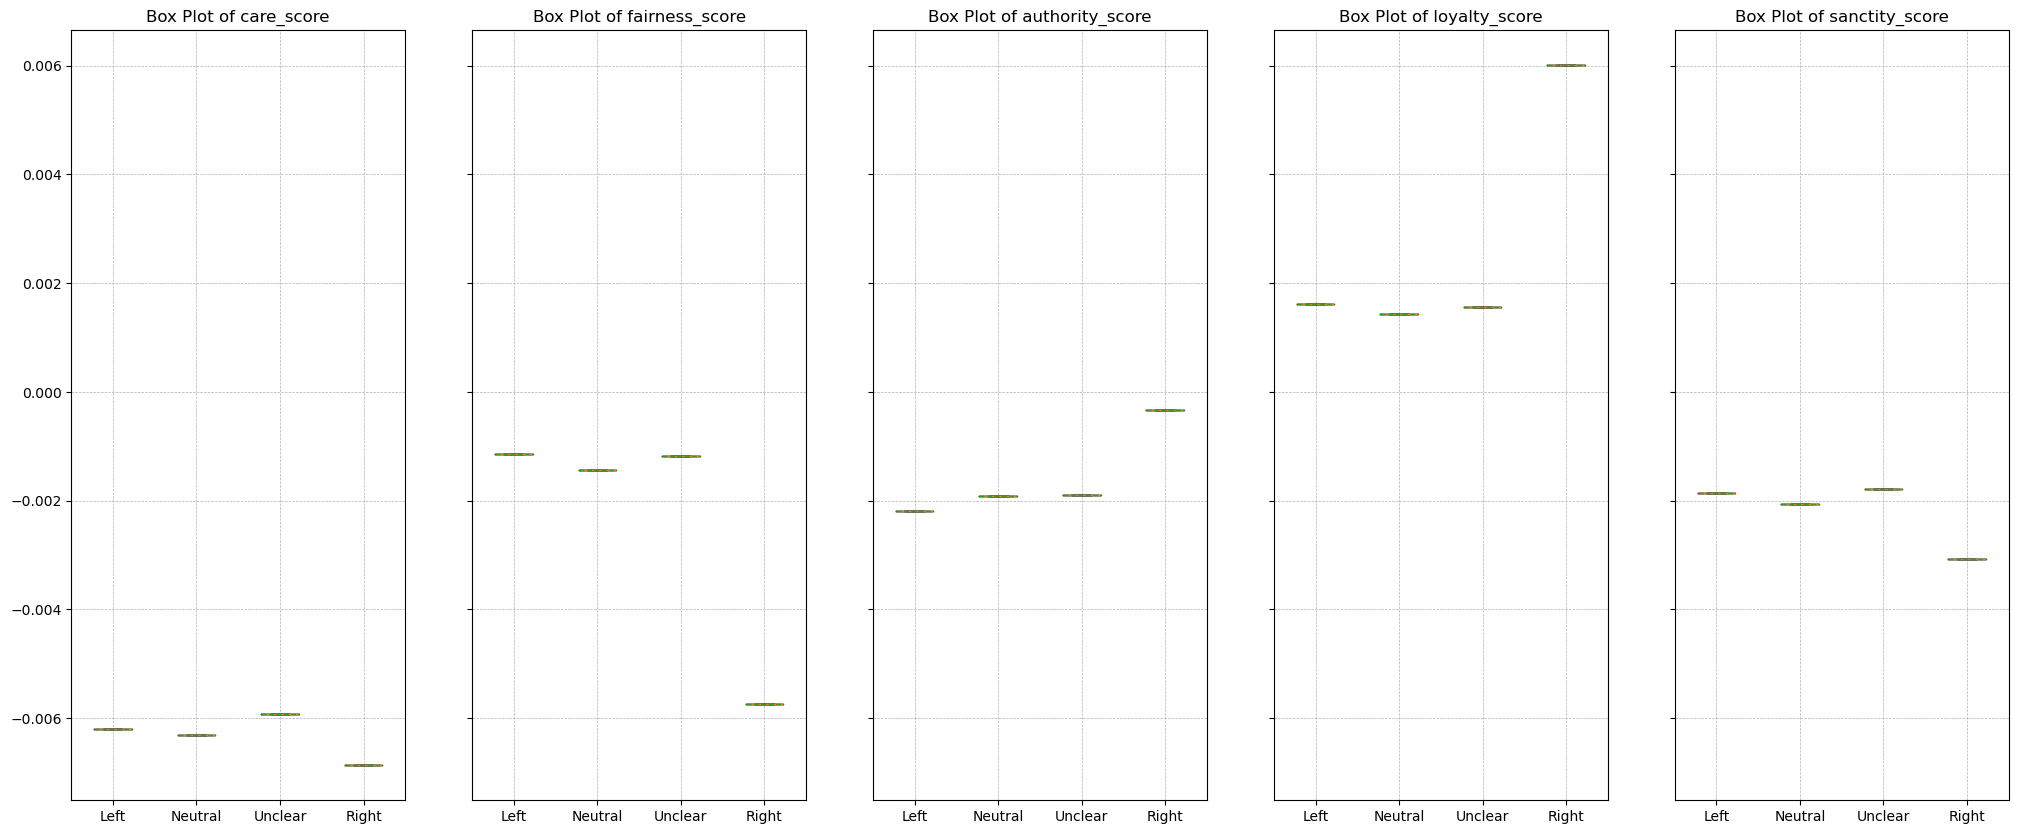

In [324]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 10), sharey=True)

foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for i in range(5):
    f = foundations[i]
    axs[i].boxplot([
        df_micro_stance[df_micro_stance['edit_stance']=='left'][f'{f}_score']['mean'],
        df_micro_stance[df_micro_stance['edit_stance']=='neutral'][f'{f}_score']['mean'],
        df_micro_stance[df_micro_stance['edit_stance']=='unclear'][f'{f}_score']['mean'],
        df_micro_stance[df_micro_stance['edit_stance']=='right'][f'{f}_score']['mean'],
    ], meanline=True, showmeans=True)

    axs[i].set_title(f'Box Plot of {f}_score')
    axs[i].set_xticklabels(['Left', 'Neutral', 'Unclear', 'Right'])

    # Config grids
    axs[i].grid(linestyle='--', linewidth=0.5)

plt.show()

#### Time series

In [325]:
df['pub_title'] = [voice_dict[id]['pub_title'] for id in voice_keys]
foundations = ['care', 'fairness', 'loyalty', 'authority', 'sanctity']

for f in foundations:
    df[f'{f}_score'] = df[f'{f}_p'] * df[f'{f}_sent']
    
def pub2stance(pub, media_data):
    for i in range(len(media_data)):
        if media_data[i][0] == pub:
            return media_data[i][1]
    print("Unexpected behavior.")
    return None

# Add editorial stances and states of media
df['edit_stance'] = df['pub_title'].apply(pub2stance, args=(target_media, ))
df_stance_ts = df.groupby(['edit_stance', 'date']).mean()
df_stance_ts.reset_index(inplace=True)

In [337]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 10), sharey=True)

foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for i in range(5):
    f = foundations[i]
    axs[i].plot(df_stance_ts[df_stance_ts['edit_stance']=='left']["date"], 
        df_stance_ts[df_stance_ts['edit_stance']=='left'][f'{f}_score'], 
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='neutral'][f'{f}_score']['mean'],
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='unclear'][f'{f}_score']['mean'],
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='right'][f'{f}_score']['mean'],
    )

    axs[i].set_title(f'Line graph of {f}_score')
    
    # Config grids
    # axs[i].grid(linestyle='--', linewidth=0.5)

plt.show()

In [338]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 10), sharey=True)

foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for i in range(5):
    f = foundations[i]
    axs[i].plot(df_stance_ts[df_stance_ts['edit_stance']=='right']["date"], 
        df_stance_ts[df_stance_ts['edit_stance']=='right'][f'{f}_score'], 
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='neutral'][f'{f}_score']['mean'],
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='unclear'][f'{f}_score']['mean'],
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='right'][f'{f}_score']['mean'],
    )

    axs[i].set_title(f'Line graph of {f}_score')
    
    # Config grids
    # axs[i].grid(linestyle='--', linewidth=0.5)

plt.show()

#### State wise analysis

In [219]:
df

care_p  fairness_p  loyalty_p  authority_p  sanctity_p  care_sent  \
0     0.100402    0.103943   0.096948     0.096278    0.083071  -0.071433   
1     0.099969    0.103417   0.104378     0.098342    0.081726  -0.072680   
2     0.095371    0.107732   0.091021     0.092887    0.084956  -0.088856   
3     0.095491    0.106358   0.102089     0.107316    0.072602  -0.048537   
4     0.098113    0.107554   0.104491     0.106935    0.085622  -0.076652   
...        ...         ...        ...          ...         ...        ...   
4142  0.086588    0.105011   0.093167     0.106428    0.073982  -0.064043   
4143  0.086588    0.105011   0.093167     0.106428    0.073982  -0.064043   
4144  0.100791    0.100508   0.099673     0.115155    0.077325  -0.043703   
4145  0.092049    0.095634   0.099886     0.100728    0.069990  -0.071771   
4146  0.083230    0.098633   0.097948     0.100655    0.065159  -0.067911   

      fairness_sent  loyalty_sent  authority_sent  sanctity_sent  \
0         -0.049573     -0.012668       -0.043196      -0.046655   
1         -0.024893     -0.000681       -0.032144      -0.043217   
2         -0.006610      0.024285        0.000154      -0.039293   
3          0.030365      0.051072        0.020814       0.032203   
4         -0.021125     -0.004107       -0.007531      -0.012738   
...             ...           ...             ...            ...   
4142      -0.016039     -0.008686       -0.028385      -0.001483   
4143      -0.016039     -0.008686       -0.028385      -0.001483   
4144       0.012350      0.022466       -0.013639       0.019080   
4145       0.003552      0.011717       -0.028720       0.022170   
4146      -0.002278      0.018836       -0.005689      -0.016719   

      moral_nonmoral_ratio     f_var  sent_var  \
0                 1.337500  0.000063  0.000443   
1                 1.712329  0.000084  0.000694   
2                 1.339806  0.000070  0.001910   
3                 2.454545  0.000204  0.001470   
4                 1.610345  0.000084  0.000893   
...                    ...       ...       ...   
4142              1.927536  0.000182  0.000607   
4143              1.927536  0.000182  0.000607   
4144              2.279412  0.000184  0.000779   
4145              1.753086  0.000159  0.001456   
4146              1.965517  0.000228  0.001049   

                                     id  \
0                    IvtpreaLh-20231119   
1     WtIVtPrfSftIVtPwisswdtrf-20231031   
2             SGlIvtprd‘fietsN-20231030   
3                   QclvtpfrAc-20231023   
4              VsNtaIvtpbAAsil-20231018   
...                                 ...   
4142                    Vl'opg-20230109   
4143                    Vl'opg-20230108   
4144                     CbNvo-20230104   
4145                     Iv'wo-20230103   
4146                    TfIvvr-20230101   

                                      pub_title  care_score  fairness_score  \
0     The Australian (Online); Canberra, A.C.T.   -0.007172       -0.005153   
1                                  7.30; Sydney   -0.007266       -0.002574   
2     The Australian (Online); Canberra, A.C.T.   -0.008474       -0.000712   
3     The Australian (Online); Canberra, A.C.T.   -0.004635        0.003230   
4     The Australian (Online); Canberra, A.C.T.   -0.007521       -0.002272   
...                                         ...         ...             ...   
4142                  AAP Bulletin Wire; Sydney   -0.005545       -0.001684   
4143              AAP General News Wire; Sydney   -0.005545       -0.001684   
4144                  AAP Bulletin Wire; Sydney   -0.004405        0.001241   
4145              AAP General News Wire; Sydney   -0.006606        0.000340   
4146                  AAP Bulletin Wire; Sydney   -0.005652       -0.000225   

      loyalty_score  authority_score  sanctity_score  
0         -0.001228        -0.004159       -0.003876  
1         -0.000071        -0.003161       -0.003532  
2          0.002210         0.0000

In [348]:
df['id'] = voice_keys
df['pub_title'] = [voice_dict[id]['pub_title'] for id in voice_keys]
# df.to_csv(OUT_CSV_PATH, index=False)


foundations = ['care', 'fairness', 'loyalty', 'authority', 'sanctity']

for f in foundations:
    df[f'{f}_score'] = df[f'{f}_p'] * df[f'{f}_sent']

# Pick out targeted media.
target_indices = [media_data[0] for media_data in target_media]
pub_filter_list = [df['pub_title'] == target_indices[i] for i in range(len(target_indices))]
pub_filter = pub_filter_list[0]
for i in range(1,len(pub_filter_list)):
    pub_filter = pub_filter | pub_filter_list[i]

df_pub_title_filtered = df[pub_filter]

In [249]:
def pub2state(pub, media_data):
    for i in range(len(media_data)):
        if media_data[i][0] == pub:
            return media_data[i][2]
    print("Unexpected behavior.")
    return None

# Add editorial stances and states of media
df_pub_title_filtered['state'] = df_pub_title_filtered['pub_title'].apply(pub2state, args=(target_media, ))

/var/folders/4y/tpc_50fx70d6w16f55qld9fw0000gn/T/ipykernel_86747/216365967.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pub_title_filtered['state'] = df_pub_title_filtered['pub_title'].apply(pub2state, args=(target_media, ))


In [251]:
df_state = df_pub_title_filtered.groupby(['state']).agg({
    f'{k}_score': ['mean', 'count'] for k in foundations
})

In [253]:
df_state

care_score       fairness_score       loyalty_score        \
               mean count           mean count          mean count   
state                                                                
ACT       -0.006034   153      -0.001182   153      0.001769   153   
NSW       -0.006580   245      -0.001520   245      0.001388   245   
NT        -0.005972    49      -0.001845    49      0.000965    49   
QLD       -0.007040    94      -0.004836    94      0.004983    94   
SA        -0.005774   112      -0.000665   112      0.001806   112   
TAS       -0.005879    76      -0.000736    76      0.001935    76   
VIC       -0.006198   199      -0.001128   199      0.001610   199   
national  -0.006817   372      -0.005959   372      0.006121   372   

         authority_score       sanctity_score        
                    mean count           mean count  
state                                                
ACT            -0.002299   153      -0.001887   153  
NSW            -0.002044   245      -0.001999   245  
NT             -0.001922    49      -0.002209    49  
QLD            -0.000845    94      -0.002994    94  
SA             -0.002064   112      -0.001280   112  
TAS            -0.001881    76      -0.001503    76  
VIC            -0.002157   199      -0.001883   199  
national       -0.000143   372      -0.003232   372

array([<Axes: title={'center': '(care_score, mean)'}, xlabel='state'>,
       <Axes: title={'center': '(fairness_score, mean)'}, xlabel='state'>,
       <Axes: title={'center': '(loyalty_score, mean)'}, xlabel='state'>,
       <Axes: title={'center': '(authority_score, mean)'}, xlabel='state'>,
       <Axes: title={'center': '(sanctity_score, mean)'}, xlabel='state'>],
      dtype=object)

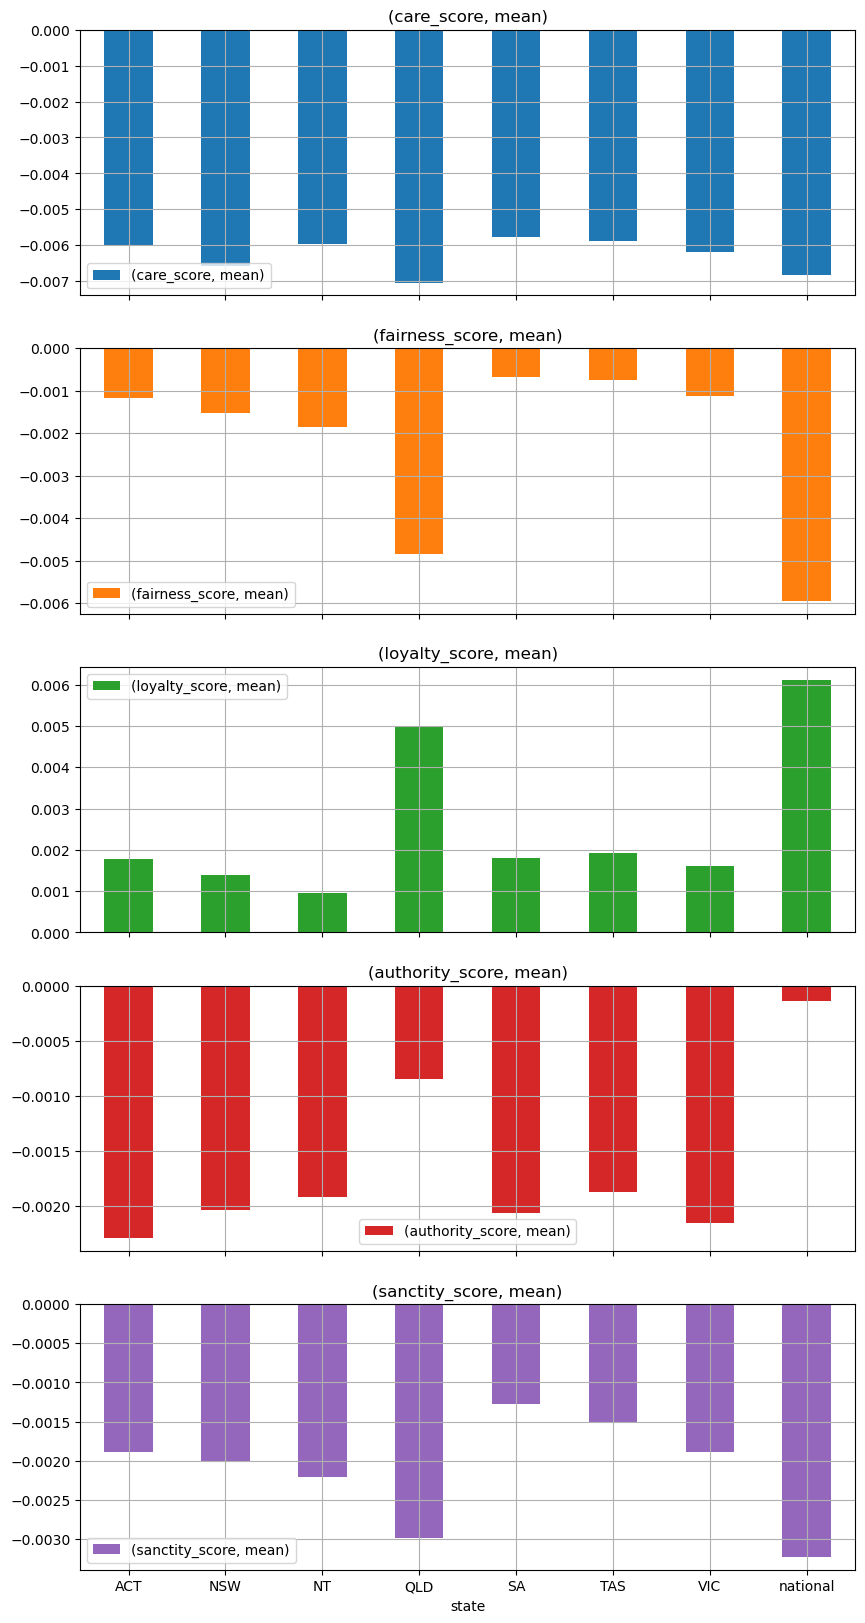

In [272]:
# df_state.plot.bar(rot=0, y=[('care_score', 'mean'), ('authority_score', 'mean')], subplots=True)
df_state.plot.bar(rot=0, y=[(f'{f}_score', 'mean') for f in foundations], subplots=True, figsize=(10, 20), grid=True)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 10), sharey=True)

foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for i in range(5):
    f = foundations[i]
    axs[i].bar(x='state', y='')

    axs[i].set_title(f'Box Plot of {f}_score')
    axs[i].set_xticklabels(['Left', 'Neutral', 'Unclear', 'Right'])

    # Config grids
    axs[i].grid(linestyle='--', linewidth=0.5)

plt.show()

df_pub_title_filtered.groupby('edit_stance').mean()

##### Time series

In [340]:
df['pub_title'] = [voice_dict[id]['pub_title'] for id in voice_keys]
foundations = ['care', 'fairness', 'loyalty', 'authority', 'sanctity']

for f in foundations:
    df[f'{f}_score'] = df[f'{f}_p'] * df[f'{f}_sent']
    
def pub2state(pub, media_data):
    for i in range(len(media_data)):
        if media_data[i][0] == pub:
            return media_data[i][2]
    print("Unexpected behavior.")
    return None

# Add editorial stances and states of media
df['state'] = df['pub_title'].apply(pub2state, args=(target_media, ))
df_state_ts = df.groupby(['state', 'date']).mean()
df_state_ts.reset_index(inplace=True)
df_state_ts

Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected be

state       date    care_p  fairness_p  loyalty_p  authority_p  \
0         ACT 2023-01-02  0.076895    0.097196   0.089780     0.094500   
1         ACT 2023-01-03  0.083353    0.096363   0.089268     0.095968   
2         ACT 2023-01-05  0.099212    0.099275   0.100585     0.115330   
3         ACT 2023-01-07  0.096467    0.105655   0.103815     0.098366   
4         ACT 2023-01-15  0.110123    0.117329   0.096558     0.103335   
..        ...        ...       ...         ...        ...          ...   
841  national 2023-11-13  0.098593    0.100618   0.102050     0.101433   
842  national 2023-11-24  0.068182    0.078947   0.064220     0.029630   
843  national 2023-11-27  0.081313    0.090543   0.082303     0.062711   
844  national 2023-11-28  0.090682    0.112427   0.092359     0.102191   
845  national 2023-12-08  0.101845    0.098413   0.101243     0.104559   

     sanctity_p  care_sent  fairness_sent  loyalty_sent  authority_sent  \
0      0.063219  -0.050880      -0.015650      0.014025        0.014863   
1      0.069015  -0.078321      -0.011214      0.027578       -0.025591   
2      0.075466  -0.047670       0.008410      0.025112       -0.004001   
3      0.083081  -0.085081      -0.015278      0.002456       -0.067465   
4      0.089893  -0.106296      -0.031870     -0.022715       -0.018593   
..          ...        ...            ...           ...             ...   
841    0.078315  -0.038995      -0.019910     -0.002501       -0.017508   
842    0.043956  -0.111978      -0.168333      0.213714        0.091450   
843    0.061620  -0.104545      -0.089155      0.104491        0.019450   
844    0.084007  -0.096348      -0.047617     -0.031521       -0.031305   
845    0.076353  -0.142065      -0.080565     -0.059558       -0.093206   

     sanctity_sent  moral_nonmoral_ratio     f_var  sent_var  care_score  \
0         0.004100              1.794872  0.000200  0.000761   -0.003912   
1        -0.036195              2.074405  0.000133  0.001605   -0.006464   
2         0.026488              2.050000  0.000204  0.000919   -0.004729   
3        -0.030441              1.867576  0.000085  0.001356   -0.008202   
4        -0.040606              1.222222  0.000117  0.001284   -0.011706   
..             ...                   ...       ...       ...         ...   
841      -0.038166              1.253968  0.000102  0.000236   -0.003845   
842      -0.117025              1.000000  0.000395  0.026727   -0.007635   
843      -0.090275              1.277778  0.000238  0.014109   -0.008403   
844      -0.042467              1.660377  0.000123  0.000725   -0.008737   
845      -0.108205              1.630435  0.000131  0.000961   -0.014469   

     fairness_score  loyalty_score  authority_score  sanctity_score  
0         -0.001521       0.001259         0.001405        0.000259  
1         -0.001093       0.002428        -0.002496       -0.002494  
2          0.000835       0.002526        -0.000461        0.001999  
3         -0.001612       0.000282        -0.006676       -0.002532  
4         -0.003739      -0.002193        -0.001921       -0.003650  
..              ...            ...              ...             ...  
841       -0.002003      -0.000255        -0.001776       -0.002989  
842       -0.013289       0.013725         0.002710       -0.005144  
843       -0.007154       0.006625        -0.001162       -0.005090  
844       -0.005353      -0.002911        -0.003199       -0.003568  
845       -0.007929      -0.006030        -0.009745       -0.008262  

[846 rows x 20 columns]

In [341]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 10), sharey=True)

foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for i in range(5):
    f = foundations[i]
    axs[i].plot(df_state_ts[df_stance_ts['state']=='QLD']["date"], 
        df_state_ts[df_stance_ts['state']=='QLD'][f'{f}_score'], 
  
    )

    axs[i].set_title(f'Line graph of {f}_score')

plt.show()

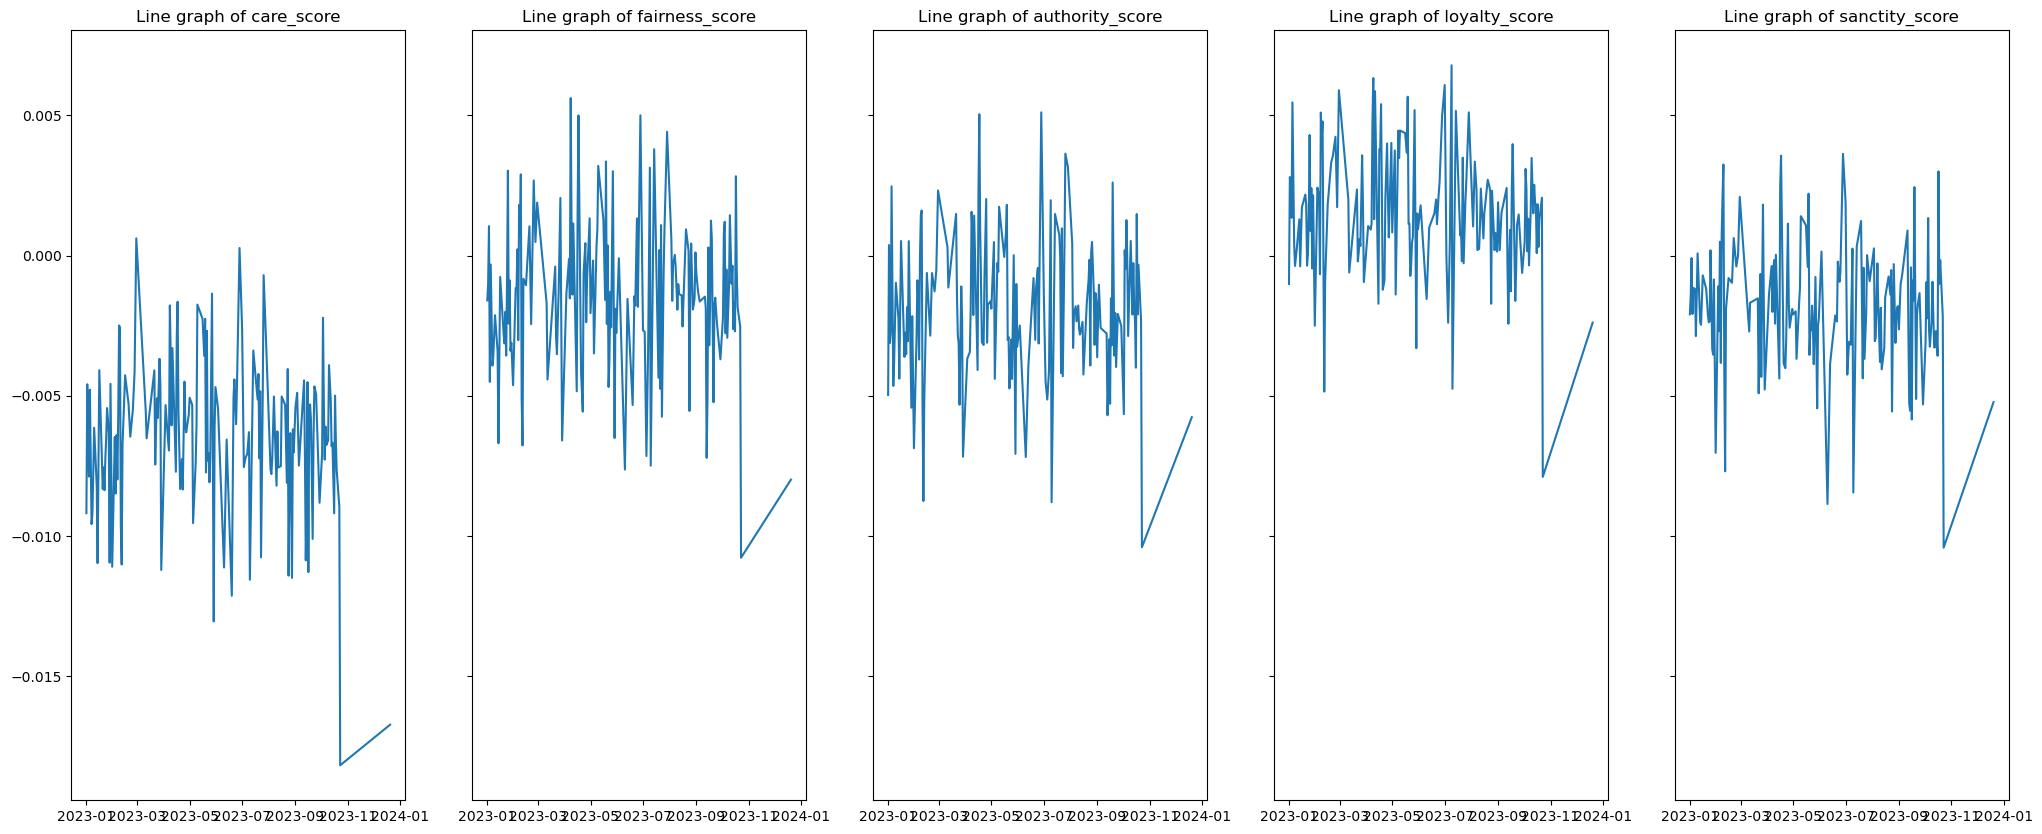

In [343]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 10), sharey=True)

foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for i in range(5):
    f = foundations[i]
    axs[i].plot(df_state_ts[df_stance_ts['state']=='NSW']["date"], 
        df_state_ts[df_stance_ts['state']=='NSW'][f'{f}_score'], 
  
    )

    axs[i].set_title(f'Line graph of {f}_score')

plt.show()

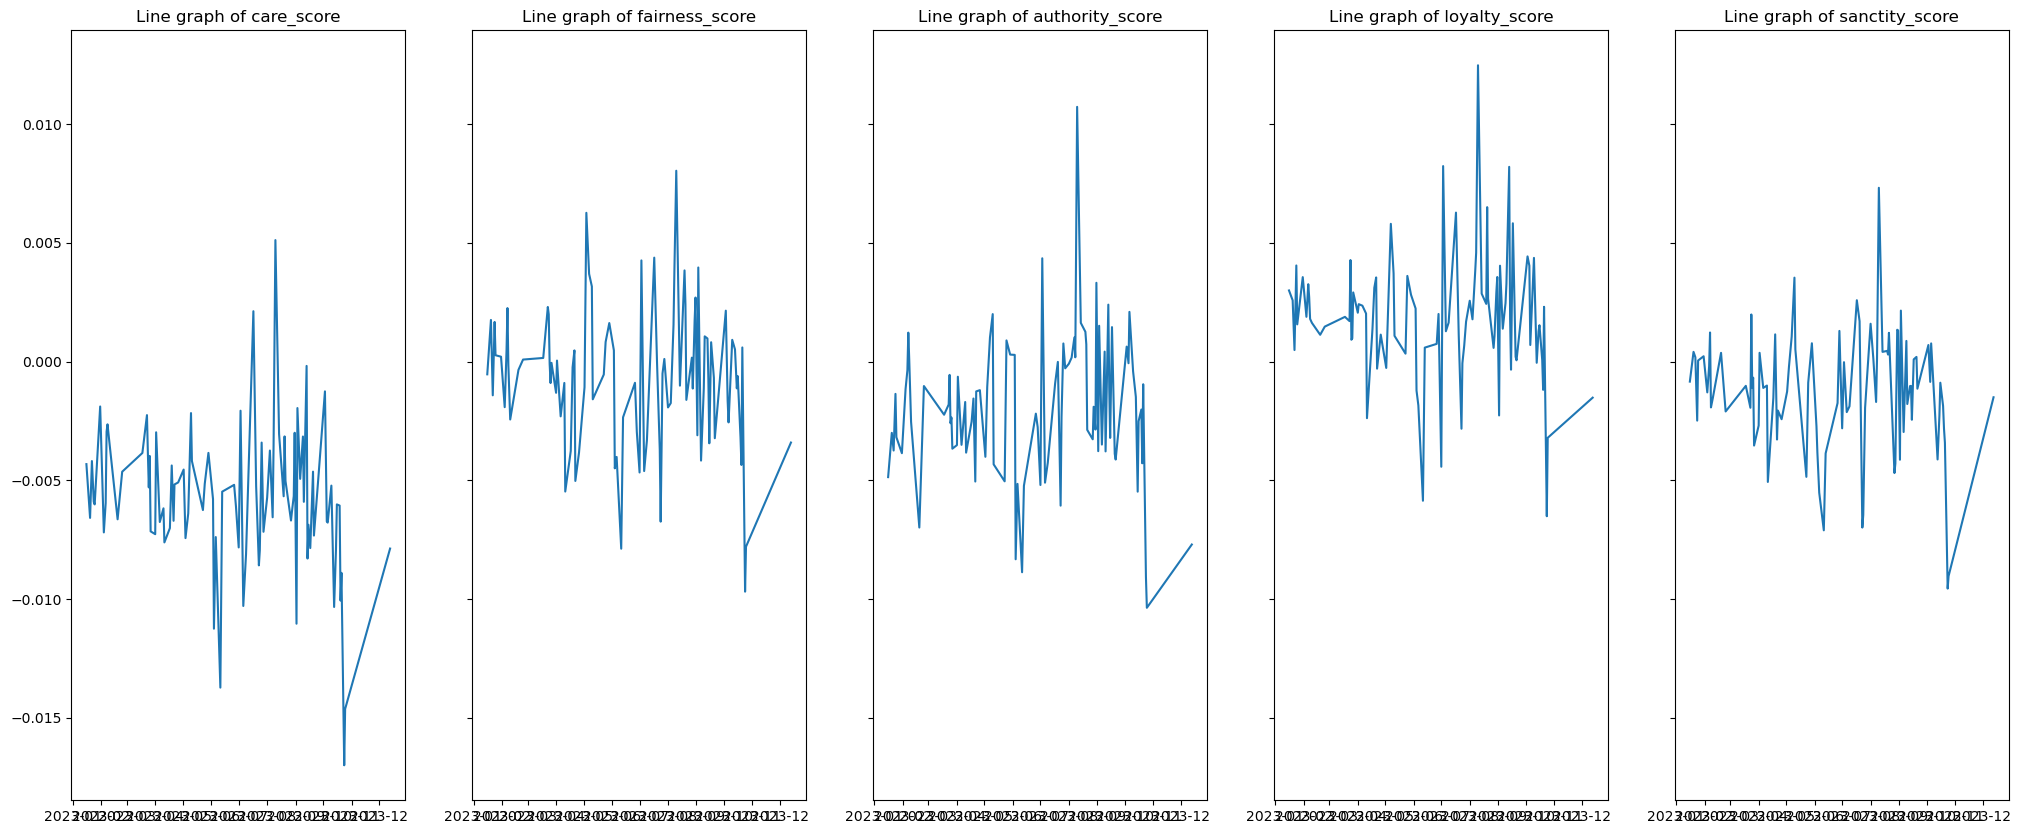

In [347]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 10), sharey=True)

foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for i in range(5):
    f = foundations[i]
    axs[i].plot(df_state_ts[df_stance_ts['state']=='SA']["date"], 
        df_state_ts[df_stance_ts['state']=='SA'][f'{f}_score'], 
  
    )

    axs[i].set_title(f'Line graph of {f}_score')

plt.show()

## Trivial search of politicians in text

In [ ]:
count = 0
pub_title_count = defaultdict(int)
for k,v in voice_dict.items():
    if "Dutton" in v["text"]:
        count += 1
        print(v["text"])
print(count)

: 